# Introduction
# This notebook presents an analysis comparing the performance of a Random Forest regression model in predicting car prices using structured data such as the car's year, mileage, and other attributes. This comparison sheds light on the strengths and weaknesses of this approach, offering insights into its applicability and effectiveness in the context of car price prediction.



# Import Required Libraries

In [ ]:

import pandas as pd  # Pandas is a powerful data manipulation library used for data analysis and manipulation.
from pathlib import Path  # Pathlib is a module for working with filesystem paths in an object-oriented way.
from google.colab import drive  # Google Colab library for mounting Google Drive to access files.
import matplotlib.pyplot as plt  # Matplotlib is a plotting library for creating static, animated, and interactive visualizations.
from sklearn.model_selection import train_test_split, learning_curve  # Library for splitting datasets into training and testing sets, and for learning curves.
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Libraries for data preprocessing such as one-hot encoding and standardization.
from sklearn.compose import ColumnTransformer  # ColumnTransformer for applying different preprocessing to different columns.
from sklearn.pipeline import Pipeline  # Pipeline for chaining multiple processing steps together.
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor model from scikit-learn for regression tasks.
from sklearn.metrics import mean_squared_error  # For evaluating the model performance
import numpy as np  # For numerical operations

# Setup and Data
# Mount Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Define paths and load dataset

In [ ]:
cars_data_directory = '/content/drive/My Drive/cars_dataset/'
cars_data_file = Path(cars_data_directory) / 'final_dataset.csv'
df = pd.read_csv(cars_data_file)

# Data Preprocessing
# We prepare the structured data for regression, set up preprocessing pipelines for scaling and encoding, and split the data into training and test sets.

In [ ]:
# Define features and target
X = df[['Brand', 'Model', 'Color', 'Body', 'Transmission', 'Engine', 'Fuel', 'Year', 'Mileage']]
y = df['price']

# Preprocessing for tabular data

# Define preprocessing pipeline

In [ ]:
cat_names = ['Brand', 'Model', 'Color', 'Body', 'Transmission', 'Engine', 'Fuel']
cont_names = ['Year', 'Mileage']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cont_names),
        ('cat', OneHotEncoder(), cat_names)
    ])

reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest regression pipeline

In [ ]:

reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Mileage']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Brand', 'Model', 'Color',
                                                   'Body', 'Transmission',
                                                   'Engine', 'Fuel'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Evaluate the Random Forest model

In [ ]:
y_pred = reg_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 11.730690229631866


# Visualizing Predictions: Actual vs. Predicted Prices
# This visualization aids in assessing the performance and accuracy of the model in predicting prices across the dataset.



# Plotting Actual vs. Predicted Prices (Line Plot)

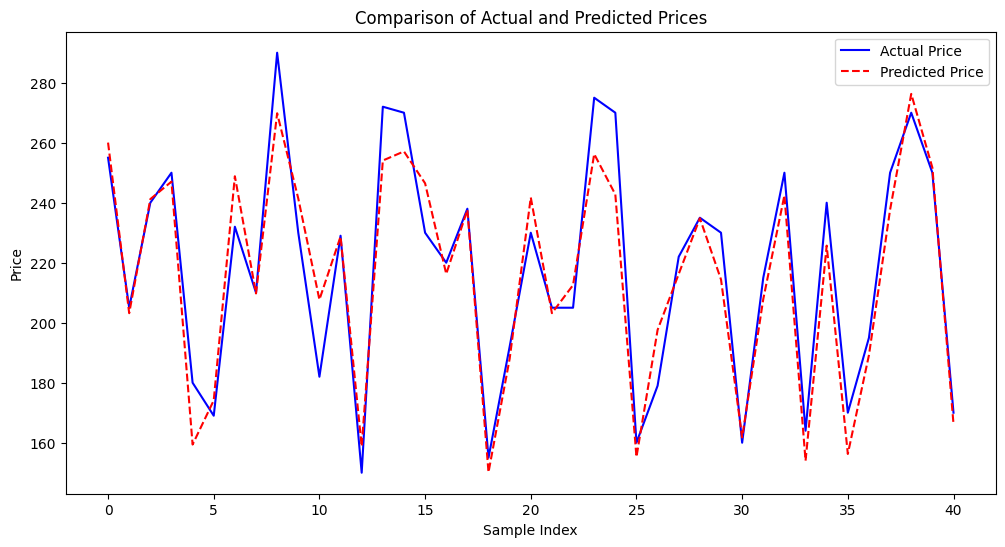

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title('Comparison of Actual and Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting Actual vs. Predicted Prices (Scatter Plot)

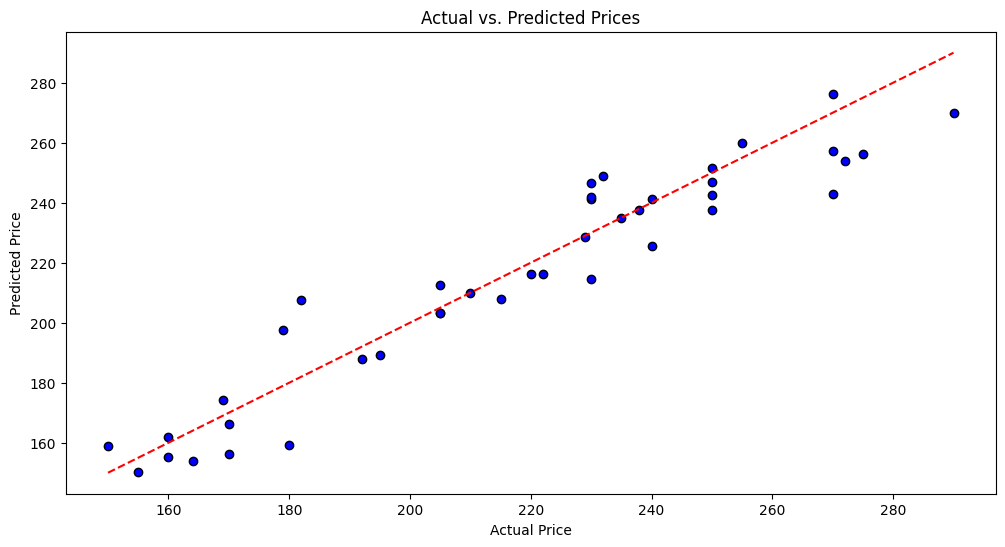

In [ ]:

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Save the Random Forest Model

We save the trained Random Forest model to disk for later use.

In [ ]:
import joblib
# Define the model path
rf_model_path = '/content/drive/My Drive/random_forest_car_price_model.pkl'

# Save the model
joblib.dump(reg_pipeline, rf_model_path)

print(f"Random Forest model saved to {rf_model_path}")

# Verify the saved model
loaded_model = joblib.load(rf_model_path)
print("Model loaded successfully.")

Random Forest model saved to /content/drive/My Drive/random_forest_car_price_model.pkl
Model loaded successfully.
